<h1> Exploracion de los Datos (EDA) </h1>

In [2]:
import pandas as pd

df = pd.read_excel('../data/processed/online_retail_II_cleaned.xlsx')

In [ ]:
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,totalprice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0
4,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,39.6


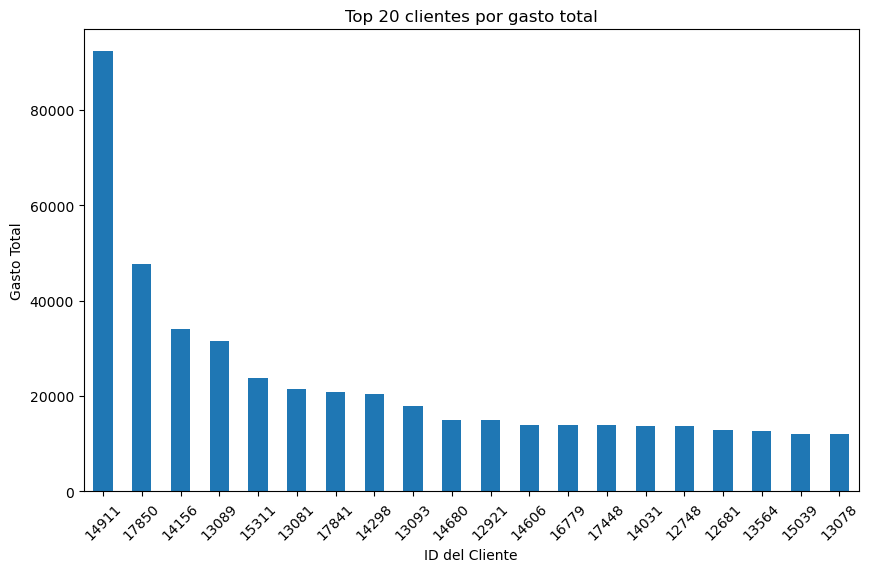

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

gasto = df.groupby('customer_id')['totalprice'].sum()

top_20 = gasto.sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
top_20.plot(kind='bar')
plt.title("Top 20 clientes por gasto total")
plt.xlabel("ID del Cliente")
plt.ylabel("Gasto Total")
plt.xticks(rotation=45)
plt.show()



C:\Users\DesktopLaptopGoD\AppData\Local\Temp\ipykernel_12264\3739258770.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('invoicedate').resample('M')['totalprice'].sum().plot(figsize=(10,4))


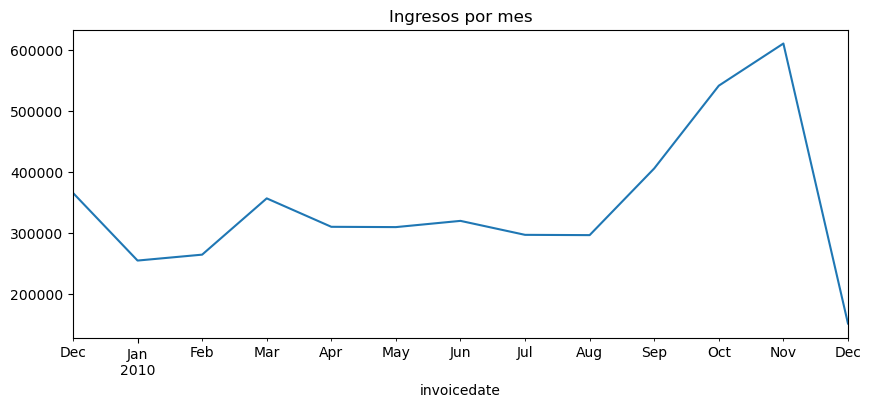

In [8]:
df.set_index('invoicedate').resample('M')['totalprice'].sum().plot(figsize=(10,4))
plt.title("Ingresos por mes")
plt.show()

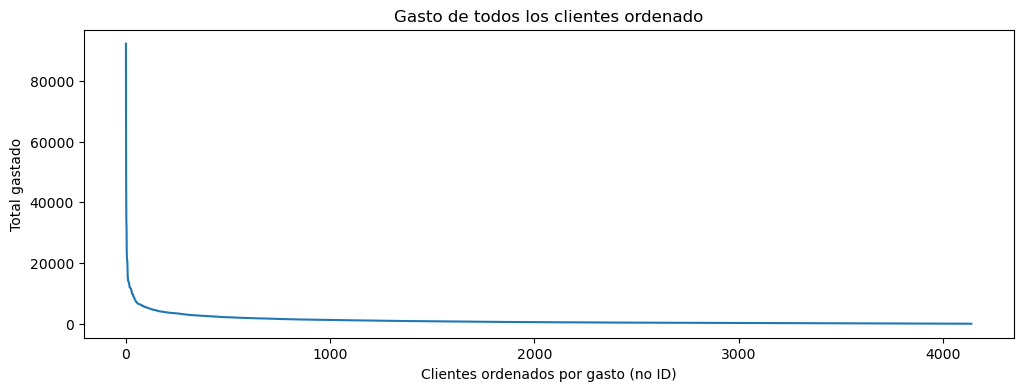

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(gasto.sort_values(ascending=False).values)
plt.title("Gasto de todos los clientes")
plt.ylabel("Total gastado")
plt.xlabel("Clientes ordenados por gasto")
plt.show()
